In [1]:
import torch
import numpy as np

In [4]:
y = torch.zeros(1)
y

tensor([0.])

In [13]:
y.random_()

tensor([12284051.])

In [14]:
# get specific class from ImageNet Val set

In [68]:
from pathlib import Path
base_dir = Path('/mnt/lustre/share/images')
val_meta_list = base_dir / 'meta/' / 'val.txt'

In [40]:
with open(val_meta_list) as val:
    val_imgs = [item.split() for item in val.readlines()]

In [52]:
from collections import defaultdict
label_map_imgs = defaultdict(list)

In [57]:
from tqdm import tqdm
for pair in tqdm(val_imgs[:]):
    label_map_imgs[int(pair[1])].append(pair[0])

100%|██████████| 50000/50000 [00:00<00:00, 893317.43it/s]


In [71]:
cars = label_map_imgs[817][:10]

In [72]:
tgt_dir = '/mnt/lustre/yslan/Repo/Generation/deep-generative-prior/data/cars/sports'

In [73]:
import shutil

In [74]:
for item in cars:
    shutil.copy(base_dir / 'val' / item, tgt_dir)

## change pretrained model weights

In [46]:
import torch
from collections import OrderedDict

def key_transformation_stylegan_d(key):
    if key.startswith('conv_body'):
        return key.replace('conv_body', 'convs')
    return key

def key_transformation_stylegan_g(key):
    if key.startswith('style_mlp'):
        return key.replace('style_mlp', 'style')
    if key.startswith('style_convs'):
        return key.replace('style_convs', 'convs')
    if key.startswith('style_conv1'):
        return key.replace('style_conv1', 'conv1')
    return key

def rename_state_dict_keys(state_dict, key_transformation, target=None):
    """
    source             -> loaded Source dict 
    key_transformation -> Function that accepts the old key names of the state
                          dict as the only argument and returns the new key name.
    target (optional)  -> Path at which the new state dict should be saved
                          (defaults to `source`)
    Example:
    Rename the key `layer.0.weight` `layer.1.weight` and keep the names of all
    other keys.
    ```py
    def key_transformation(old_key):
        if old_key == "layer.0.weight":
            return "layer.1.weight"
        return old_key
    rename_state_dict_keys(state_dict_path, key_transformation)
    ```
    """
  
#     state_dict = torch.load(source)
    new_state_dict = OrderedDict()

    for key, value in state_dict.items():
        new_key = key_transformation(key)
        new_state_dict[new_key] = value

    torch.save(new_state_dict, target)


In [47]:
import torch
stylegan_g = '/mnt/lustre/yslan/Repo/NVS/Projects/Generative/stylegan2-pytorch/checkpoint/pretrained/stylegan2_car_config_f_512_official-e8fcab4f.pth'

In [95]:
d = '/mnt/lustre/yslan/Repo/NVS/Projects/Generative/stylegan2-pytorch/checkpoint/pretrained/stylegan2_car_config_f_512_discriminator_official-5008e3d1.pth'
d = torch.load(d)

In [96]:
# rename_state_dict_keys(stylegan_g, key_transformation_stylegan_g, 'stylegan2_car_512_g.pth')
rename_state_dict_keys(d, key_transformation_stylegan_d, 'stylegan2_car_512_d.pth')

In [6]:
from collections import OrderedDict

In [97]:
!pwd

/mnt/lustre/yslan/Repo/Generation/deep-generative-prior


In [98]:
d = 'stylegan2_car_512_d.pth'
d = torch.load(d)

* style_mlp -> style
* style_conv -> convs
* style_conv1 -> conv1

In [103]:
torch.zeros(5).uniform_(-1,1)

tensor([-0.3451,  0.1124,  0.8139, -0.3856,  0.5316])

In [23]:
s

dict_keys(['params'])

In [28]:

torch.rand((3,4))[:,None][0].shape

torch.Size([1, 4])

In [64]:
z = torch.rand((1,512))

In [59]:
import matplotlib.pyplot as plt

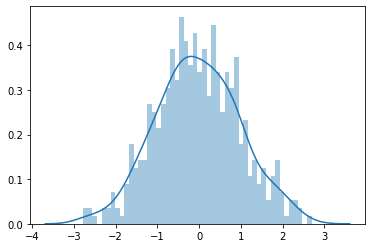

In [72]:
import seaborn as sns, numpy as np
# sns.set_theme(); 
np.random.seed(0)
x = np.random.randn(512)
ax = sns.distplot(x, bins=50)

In [74]:
np.linalg.norm(x)

22.610672738599302

In [76]:
z = torch.rand(5)

In [77]:
z

tensor([0.6378, 0.0481, 0.5153, 0.1855, 0.1522])

In [94]:
torch.zeros(5)[[1,2]].unbind()

(tensor(0.), tensor(0.))

In [116]:
import quaternion

In [121]:
# Parameters for the transformation
theta = 0.1
phi = 0.1
tx = 0
ty = 0
tz = 0.1

RT = torch.eye(4).unsqueeze(0)
# Set up rotation
RT[0,0:3,0:3] = torch.Tensor(quaternion.as_rotation_matrix(quaternion.from_rotation_vector([phi, theta, 0])))

In [126]:
quaternion.as_float_array(quaternion.from_rotation_matrix(RT[0,:3,:3]))

array([ 0.99750104,  0.04995834,  0.04995834, -0.        ])

In [119]:
RT[0]

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [137]:
ckpt_p = torch.load('./biggan/pose_aware_net/pose_aware_net.pth')

/mnt/lustre/yslan/local/anaconda3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [155]:
img = np.random.randn(32,32,3)
img.shape

(32, 32, 3)

In [1]:
img.shape

NameError: name 'img' is not defined